 <div style="color:white;
           display:fill;
           border-radius:5px;
           background-color:#c71585;
           font-size:200%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding: 30px;text-align:center;
              color:white;">
            👩🏼‍💻 Recommendation Systems Tutorial 👩🏼‍💻
        </p>
    </div>
    </p>
</div>

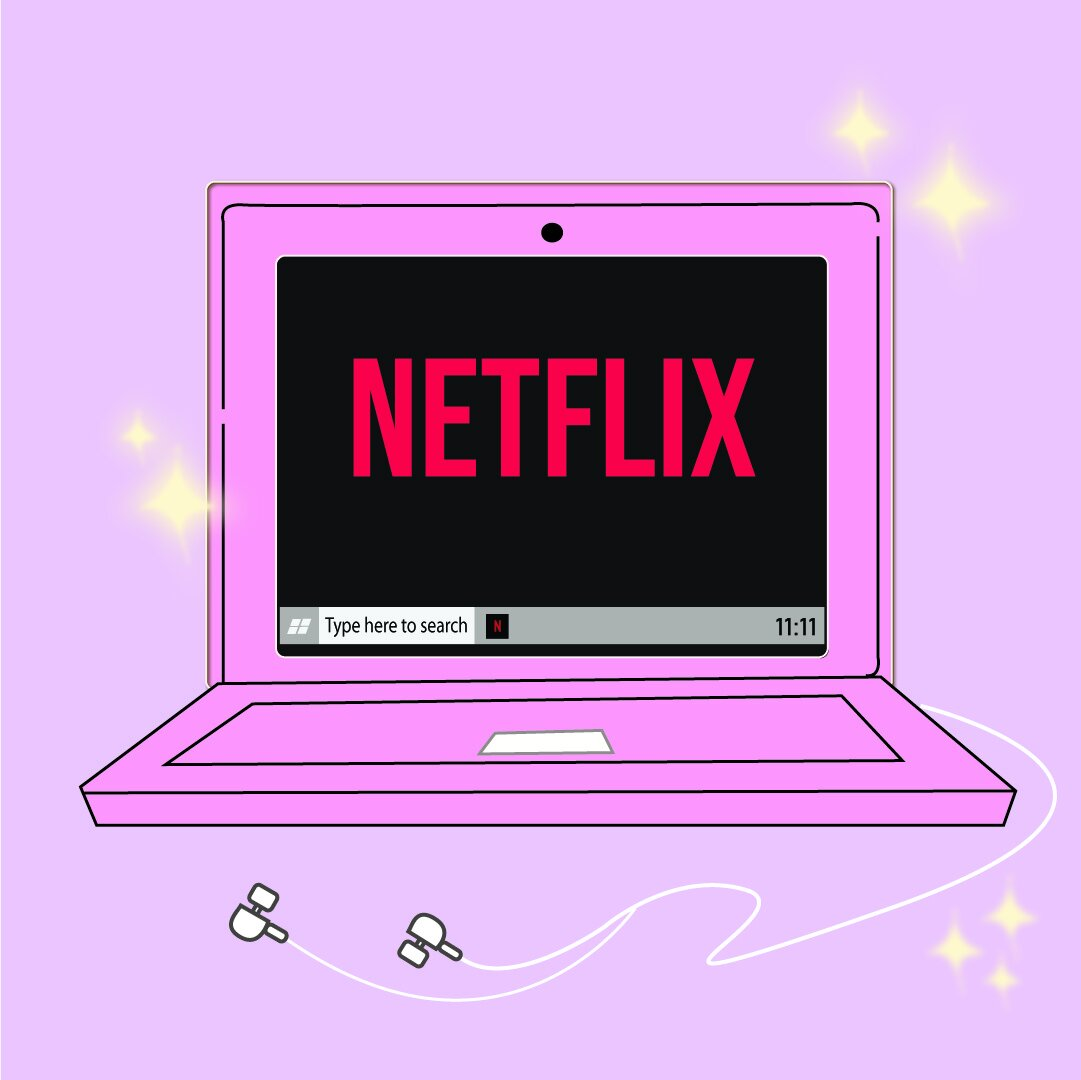

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#dda0dd;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:2px;
              color:black;">
▶️Recommender System is a system that seeks to predict or filter preferences according to the user’s choices. Recommender systems are utilized in a variety of areas including movies, music, news, books, research articles, search queries, social tags, and products in general. 
Recommender systems produce a list of recommendations in any of the two ways – 

💣Collaborative filtering: Collaborative filtering approaches build a model from the user’s past behavior (i.e. items purchased or searched by the user) as well as similar decisions made by other users. This model is then used to predict items (or ratings for items) that users may have an interest in.
            
💣Content-based filtering: Content-based filtering approaches uses a series of discrete characteristics of an item in order to recommend additional items with similar properties. Content-based filtering methods are totally based on a description of the item and a profile of the user’s preferences. It recommends items based on the user’s past preferences.
            
▶️They’re used by various large name companies like Google, Instagram, Spotify, Amazon, Reddit, Netflix etc. often to increase engagement with users and the platform. For example, Spotify would recommend songs similar to the ones you’ve repeatedly listened to or liked so that you can continue using their platform to listen to music. Amazon uses recommendations to suggest products to various users based on the data they have collected for that user.Recommender systems are often seen as a “black box”, the model created by these large companies are not very easily interpretable
        </p>
    </div>
    </p>
</div>


<span  style="padding: 30px;text-align:center;
              color:white;">
            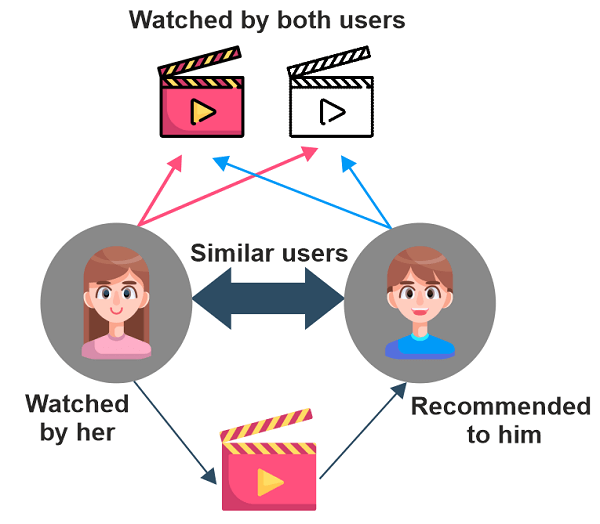
      </span>

<div style="color:black;
           display:fill;
           border-radius:5px;
           background-color:#dda0dd;
           font-size:110%;
           font-family:Verdana;
           letter-spacing:0.5px">
        <p style="padding:2px;
              color:black;">
▶️Examples of Recommender Systems
            
Some of the most popular examples of recommender systems include the ones used by Amazon, Netflix, and Spotify.

▶️Amazon’s recommender system is based on a combination of collaborative filtering and content-based algorithms. It uses past customer behavior to make recommendations for new products. Amazon’s recommender system is one of the most complex and sophisticated in the world.
            
▶️Netflix’s recommender system is also based on a combination of collaborative filtering and content-based algorithms. However, Netflix takes things a step further by also incorporating machine learning into its algorithm. This allows Netflix to make predictions about what a user might want to watch based on the behavior of other users.
            
▶️Spotify’s recommender system is based on collaborative filtering. It uses past user behavior to make recommendations for new songs to listen to.
        </p>
    </div>
    </p>
</div>


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/movielens-20m-dataset/rating.csv
/kaggle/input/movielens-20m-dataset/link.csv
/kaggle/input/movielens-20m-dataset/genome_tags.csv
/kaggle/input/movielens-20m-dataset/genome_scores.csv
/kaggle/input/movielens-20m-dataset/tag.csv
/kaggle/input/movielens-20m-dataset/movie.csv


 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px">import movie data set and rating data set look at columns and choosing columns</h2> </center><a id="4"></a>

In [2]:
movie=pd.read_csv("/kaggle/input/movielens-20m-dataset/movie.csv")
movie.columns
movie = movie.loc[:,["movieId","title"]]
movie.head()

,movieId,title
0,1,Toy Story (1995)
1,2,Jumanji (1995)
2,3,Grumpier Old Men (1995)
3,4,Waiting to Exhale (1995)
4,5,Father of the Bride Part II (1995)


In [3]:
rating=pd.read_csv("/kaggle/input/movielens-20m-dataset/rating.csv")
rating.columns
rating=rating.loc[:,["movieId","userId","rating"]]
rating.head()

,movieId,userId,rating
0,2,1,3.5
1,29,1,3.5
2,32,1,3.5
3,47,1,3.5
4,50,1,3.5


 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px">merge movie and rating data</h2> </center><a id="4"></a>

In [4]:
data = pd.merge(movie,rating)
data.head()

,movieId,title,userId,rating
0,1,Toy Story (1995),3,4.0
1,1,Toy Story (1995),6,5.0
2,1,Toy Story (1995),8,4.0
3,1,Toy Story (1995),10,4.0
4,1,Toy Story (1995),11,4.5


In [5]:
data.shape

(20000263, 4)

 <center><h2
     style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px">limit too much data</h2></center><a id="4"></a>

In [6]:
data = data.iloc[:1000000,:]

 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px"> Calculate mean rating of all movies</h2> </center><a id="4"></a>

In [7]:
data.groupby('title')['rating'].mean().sort_values(ascending=False).head(10)

title
Usual Suspects, The (1995)                       4.334372
Taxi Driver (1976)                               4.110576
Persuasion (1995)                                4.057546
Seven (a.k.a. Se7en) (1995)                      4.053493
Braveheart (1995)                                4.042534
Antonia's Line (Antonia) (1995)                  4.004925
Hate (Haine, La) (1995)                          3.996434
Postman, The (Postino, Il) (1994)                3.978396
Chungking Express (Chung Hing sam lam) (1994)    3.969251
Sense and Sensibility (1995)                     3.968573
Name: rating, dtype: float64

 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px"> Calculate count rating of all movies</h2> </center><a id="4"></a>

In [8]:
data.groupby('title')['rating'].count().sort_values(ascending=False).head(10)

title
Braveheart (1995)                            53769
Toy Story (1995)                             49695
Usual Suspects, The (1995)                   47006
Twelve Monkeys (a.k.a. 12 Monkeys) (1995)    44980
Seven (a.k.a. Se7en) (1995)                  43249
Babe (1995)                                  32255
GoldenEye (1995)                             29005
Clueless (1995)                              26254
Taxi Driver (1976)                           24481
Get Shorty (1995)                            24116
Name: rating, dtype: int64

 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px"> Creating dataframe with 'rating' count values</h2> </center><a id="4"></a>

In [9]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
  
ratings.head()

,rating,num of ratings
title,,
Ace Ventura: When Nature Calls (1995),2.607412,20938
Across the Sea of Time (1995),3.017647,85
"Amazing Panda Adventure, The (1995)",2.912069,580
"American President, The (1995)",3.667713,18162
Angela (1995),3.115385,39


 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px"> Creating dataframe with 'rating' count values</h2> </center><a id="4"></a>

In [10]:
ratings = pd.DataFrame(data.groupby('title')['rating'].mean()) 
  
ratings['num of ratings'] = pd.DataFrame(data.groupby('title')['rating'].count())
  
ratings.head()

,rating,num of ratings
title,,
Ace Ventura: When Nature Calls (1995),2.607412,20938
Across the Sea of Time (1995),3.017647,85
"Amazing Panda Adventure, The (1995)",2.912069,580
"American President, The (1995)",3.667713,18162
Angela (1995),3.115385,39


 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px">plot graph of 'num of ratings column'</h2> </center><a id="4"></a>

<AxesSubplot:>

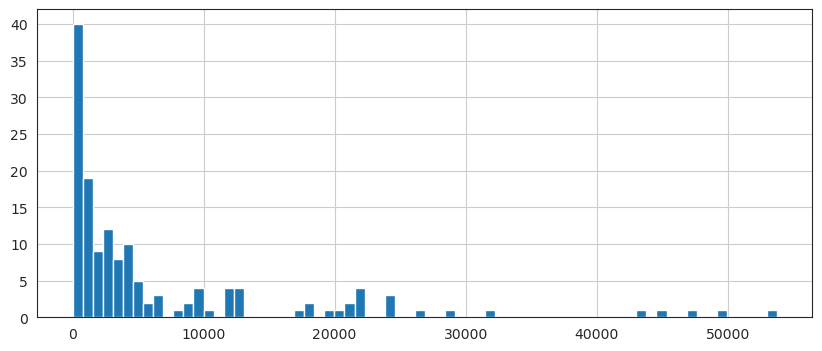

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline
# plot graph of 'num of ratings column'
plt.figure(figsize =(10, 4))
  
ratings['num of ratings'].hist(bins = 70)

 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px">plot graph of 'ratings' column</h2> </center><a id="4"></a>

<AxesSubplot:>

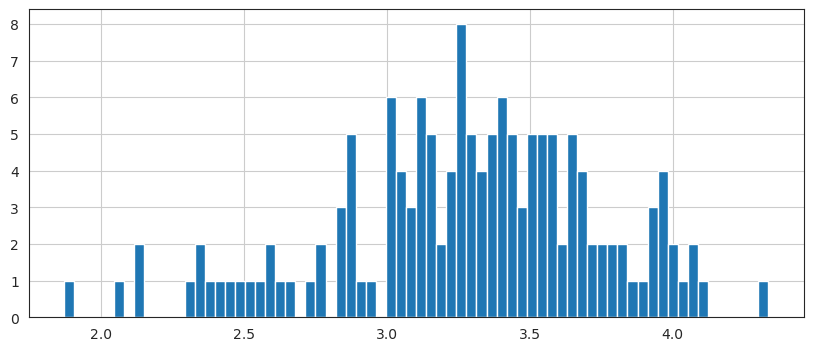

In [12]:
plt.figure(figsize =(10, 4))
  
ratings['rating'].hist(bins = 70)

In [13]:
# Sorting values according to the 'num of rating column'
moviemat = data.pivot_table(index ='userId',
              columns ='title', values ='rating')
  
moviemat.head()
  
ratings.sort_values('num of ratings', ascending = False).head(10)

,rating,num of ratings
title,,
Braveheart (1995),4.042534,53769
Toy Story (1995),3.921240,49695
"Usual Suspects, The (1995)",4.334372,47006
Twelve Monkeys (a.k.a. 12 Monkeys) (1995),3.898055,44980
Seven (a.k.a. Se7en) (1995),4.053493,43249
Babe (1995),3.643094,32255
GoldenEye (1995),3.430029,29005
Clueless (1995),3.413632,26254
Taxi Driver (1976),4.110576,24481


 <center><h2 style="background-color:#db7093;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px">make a pivot table in order to make rows are users and columns are movies. And values are rating</h2> </center><a id="4"></a>

In [14]:
pivot_table = data.pivot_table(index = ["userId"],columns = ["title"],values = "rating")
pivot_table.head(10)

title,Ace Ventura: When Nature Calls (1995),Across the Sea of Time (1995),"Amazing Panda Adventure, The (1995)","American President, The (1995)",Angela (1995),Angels and Insects (1995),Anne Frank Remembered (1995),Antonia's Line (Antonia) (1995),Assassins (1995),Babe (1995),...,Unforgettable (1996),Up Close and Personal (1996),"Usual Suspects, The (1995)",Vampire in Brooklyn (1995),Waiting to Exhale (1995),When Night Is Falling (1995),"White Balloon, The (Badkonake sefid) (1995)",White Squall (1996),Wings of Courage (1995),"Young Poisoner's Handbook, The (1995)"
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 <center><h2 style="background-color:#c71585;color:white;font-family:newtimeroman;font-size:200%;border-radius: 5px 5px">RESULT</h2> </center><a id="4"></a>

In [15]:
movie_watched = pivot_table["Toy Story (1995)"]
similarity_with_other_movies = pivot_table.corrwith(movie_watched)  # find correlation between "Bad Boys (1995)" and other movies
similarity_with_other_movies = similarity_with_other_movies.sort_values(ascending=False)
similarity_with_other_movies.head()

title
Toy Story (1995)                                                  1.000000
Gospa (1995)                                                      0.516264
Shadows (Cienie) (1988)                                           0.508859
Happiness Is in the Field (Bonheur est dans le pré, Le) (1995)    0.495360
Across the Sea of Time (1995)                                     0.461406
dtype: float64